In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#print(df_train[["Age", "Work_Experience", "Family_Size"]].quantile([.25, .5, .75], axis = 0))

#print("\nMin : {0}".format(df_train["Age"].min()))
#print("Max : {0}".format(df_train["Age"].max()))

#print(df_test[["Age", "Work_Experience", "Family_Size"]].quantile([.25, .5, .75], axis = 0))

#print("\nMin : {0}".format(df_test["Age"].min()))
#print("Max : {0}".format(df_test["Age"].max()))

c:\users\hanun\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

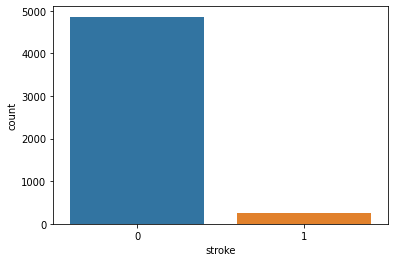

In [4]:
import seaborn as sns
sns.countplot(df['stroke'])

In [5]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [6]:
df = df.dropna(axis=0)
df = df.drop('id', 1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df_encode = df
df_encode["gender"] = ord_enc.fit_transform(df_encode[["gender"]])
df_encode["ever_married"] = ord_enc.fit_transform(df_encode[["ever_married"]])
df_encode["work_type"] = ord_enc.fit_transform(df_encode[["work_type"]])
df_encode["smoking_status"] = ord_enc.fit_transform(df_encode[["smoking_status"]])
df_encode["Residence_type"] = ord_enc.fit_transform(df_encode[["Residence_type"]])

df_encode

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1
5,1.0,81.0,0,0,1.0,2.0,1.0,186.21,29.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,13.0,0,0,0.0,4.0,0.0,103.08,18.6,0.0,0
5106,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.0,2.0,0
5107,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.6,2.0,0
5108,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.6,1.0,0


In [8]:
import seaborn as sns
df_encode.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.030738,0.021578,0.082712,-0.037237,0.058560,-0.005014,0.053664,-0.026678,-0.060004,0.006757
age,-0.030738,1.000000,0.274425,0.257123,0.680782,-0.366987,0.010948,0.235838,0.333398,0.275515,0.232331
hypertension,0.021578,0.274425,1.000000,0.115991,0.162406,-0.052750,-0.001074,0.180543,0.167811,0.110808,0.142515
heart_disease,0.082712,0.257123,0.115991,1.000000,0.111245,-0.030373,-0.002362,0.154525,0.041357,0.055236,0.137938
ever_married,-0.037237,0.680782,0.162406,0.111245,1.000000,-0.357946,0.004989,0.151377,0.341695,0.264642,0.105089
work_type,0.058560,-0.366987,-0.052750,-0.030373,-0.357946,1.000000,-0.005422,-0.050581,-0.304876,-0.310911,-0.033756
Residence_type,-0.005014,0.010948,-0.001074,-0.002362,0.004989,-0.005422,1.000000,-0.007617,-0.000122,0.013810,0.006031
avg_glucose_level,0.053664,0.235838,0.180543,0.154525,0.151377,-0.050581,-0.007617,1.000000,0.175502,0.066335,0.138936
bmi,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.224473,0.042374
smoking_status,-0.060004,0.275515,0.110808,0.055236,0.264642,-0.310911,0.013810,0.066335,0.224473,1.000000,0.051558


In [9]:
from imblearn.over_sampling import SMOTE 

X = df_encode.drop('stroke', axis=1)
y = df_encode['stroke']

sm = SMOTE(random_state=200)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {df_encode.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
print("After OverSampling, counts of label '1': {}".format(sum(y_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_sm==0)))


Shape of X before SMOTE: (4909, 11)
Shape of X after SMOTE: (9400, 10)

Balance of positive and negative classes (%):
After OverSampling, counts of label '1': 4700
After OverSampling, counts of label '0': 4700


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.2
)

print("Jumlah Data Train : {0}".format(len(x_train)))
print("Jumlah Data Test : {0}".format(len(x_test)))

Jumlah Data Train : 7520
Jumlah Data Test : 1880


In [11]:
y_test.value_counts()

1    950
0    930
Name: stroke, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, confusion_matrix, roc_curve, auc
import seaborn as sns

def testing_score(y_test, preds):
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    accs.append(accuracy)
    precisions.append(precision)
    
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix', size=16)
    sns.heatmap(cm, annot=True, cmap='Blues');

In [14]:
model = ["Random Forest", "Decision Tree", "Naive Bayes", "KNN", "MLP", "SVM", "XGBoost"]
accs = []
precisions = []
times = []

In [15]:
#==================== RF ===================

Accuracy  : 0.9521276595744681
Precision : 0.9521286229091784
Time      : 0.28107357025146484


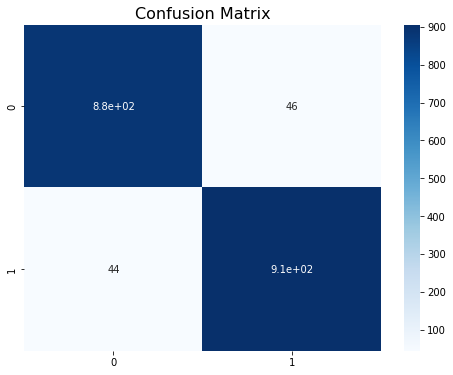

In [16]:
from sklearn.ensemble import RandomForestClassifier

time_start = time.time()
classifier = RandomForestClassifier(n_estimators = 3, criterion = 'gini')
classifier.fit(x_train, y_train)

preds = classifier.predict(x_test)
testing_score(y_test, preds)

time_computation = time.time()-time_start
times.append(time_computation)
print("Time      : {}".format(time_computation))

In [17]:
#===================== Decision Tree ======================

Accuracy  : 0.9478723404255319
Precision : 0.9482001282522201
Time      : 0.3069913387298584


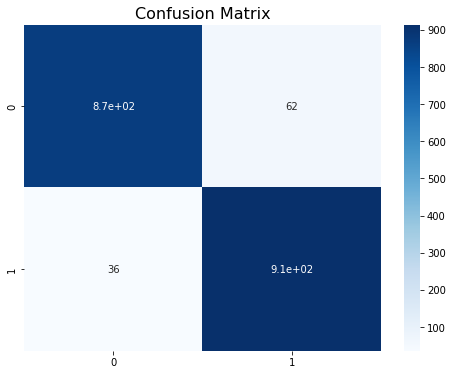

In [18]:
from sklearn.tree import DecisionTreeClassifier

time_start = time.time()
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(x_train, y_train)

preds = classifier.predict(x_test)
testing_score(y_test, preds)

time_computation = time.time()-time_start
times.append(time_computation)
print("Time      : {}".format(time_computation))

In [19]:
#===================== Naive Bayes ======================

Accuracy  : 0.7585106382978724
Precision : 0.767441814423449
Time      : 0.14000153541564941


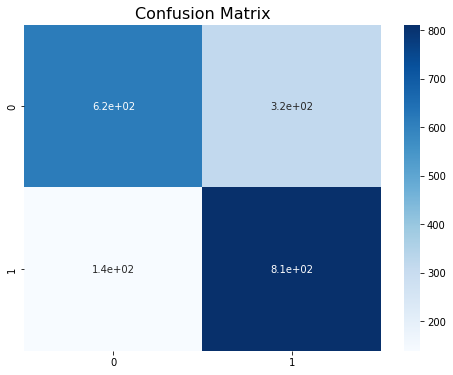

In [20]:
from sklearn.naive_bayes import GaussianNB

time_start = time.time()
classifier = GaussianNB()
classifier.fit(x_train, y_train)

preds = classifier.predict(x_test)
testing_score(y_test, preds)

time_computation = time.time()-time_start
times.append(time_computation)
print("Time      : {}".format(time_computation))

In [21]:
#===================== KNN ======================

Accuracy  : 0.9297872340425531
Precision : 0.9325595215026677
Time      : 0.46999573707580566


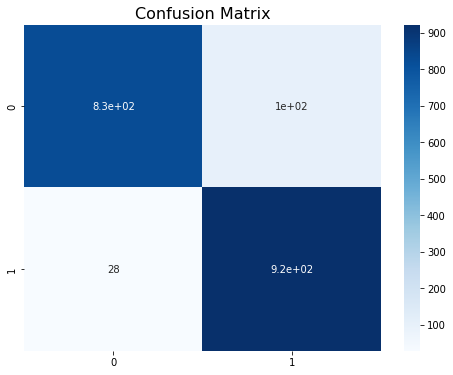

In [22]:
from sklearn.neighbors import KNeighborsClassifier

time_start = time.time()
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(x_train, y_train)

preds = neigh.predict(x_test)
testing_score(y_test, preds)

time_computation = time.time()-time_start
times.append(time_computation)
print("Time      : {}".format(time_computation))

In [23]:
#===================== MLP ======================

c:\users\hanun\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy  : 0.9111702127659574
Precision : 0.9115870280748753
Time      : 8.626221418380737


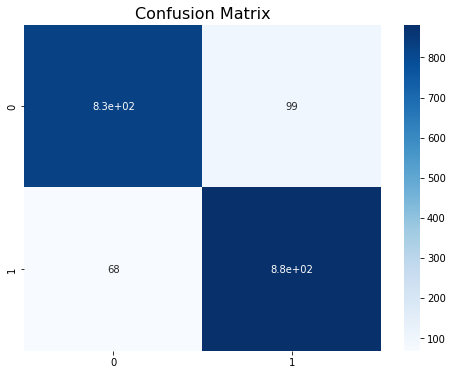

In [24]:
from sklearn.neural_network import MLPClassifier

time_start = time.time()
classifier = MLPClassifier().fit(x_train, y_train)

preds = classifier.predict(x_test)
testing_score(y_test, preds)

score = classifier.score(x_test,y_test)

time_computation = time.time()-time_start
times.append(time_computation)
print("Time      : {}".format(time_computation))

In [25]:
#===================== SVM ======================

Accuracy  : 0.8218085106382979
Precision : 0.8242938363375281
Time      : 27.258944749832153


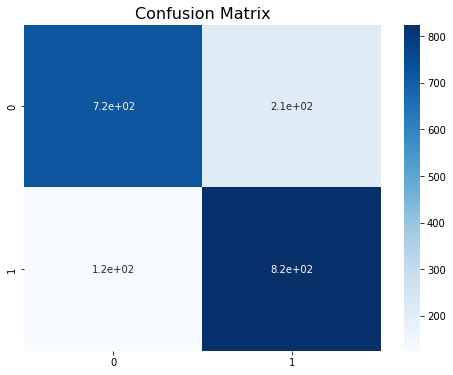

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
clf = make_pipeline(StandardScaler(), NuSVC(probability=True))
clf.fit(x_train, y_train)

preds = clf.predict(x_test)
testing_score(y_test, preds)

score = classifier.score(x_test,y_test)

time_computation = time.time()-time_start
times.append(time_computation)
print("Time      : {}".format(time_computation))

In [27]:
#===================== XGBoost ======================

c:\users\hanun\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:23:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy  : 0.9691489361702128
Precision : 0.9695170441297922
Time      : 31.937448740005493


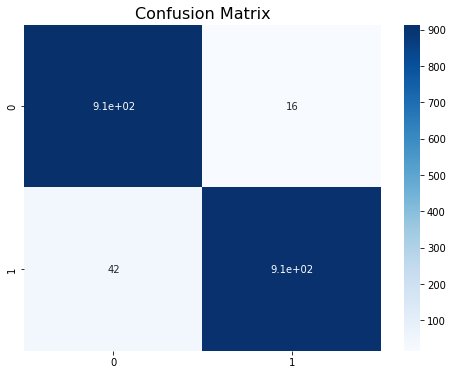

In [28]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(x_train, y_train)

preds = clf.predict(x_test)
testing_score(y_test, preds)

score = classifier.score(x_test,y_test)

time_computation = time.time()-time_start
times.append(time_computation)
print("Time      : {}".format(time_computation))

In [29]:
d = {'Model': model, 'Accuracy': accs, 'Precision': precisions, 'Time': times}
pd.DataFrame(data=d)

,Model,Accuracy,Precision,Time
0,Random Forest,0.952128,0.952129,0.281074
1,Decision Tree,0.947872,0.948200,0.306991
2,Naive Bayes,0.758511,0.767442,0.140002
3,KNN,0.929787,0.932560,0.469996
4,MLP,0.911170,0.911587,8.626221
5,SVM,0.821809,0.824294,27.258945
6,XGBoost,0.969149,0.969517,31.937449


[0.9521276595744681, 0.9478723404255319, 0.7585106382978724, 0.9297872340425531, 0.9111702127659574, 0.8218085106382979, 0.9691489361702128]
[0.9521286229091784, 0.9482001282522201, 0.767441814423449, 0.9325595215026677, 0.9115870280748753, 0.8242938363375281, 0.9695170441297922]


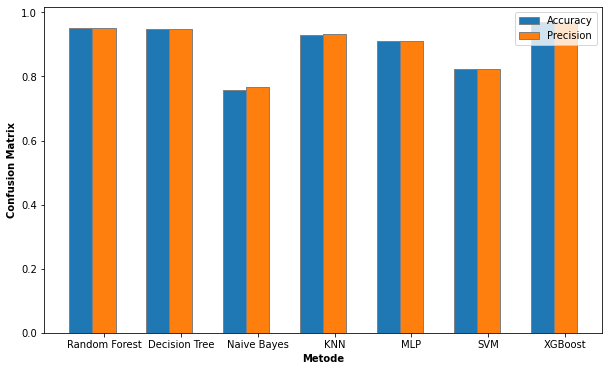

In [31]:
import numpy as np
# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(10, 6))
 
# set height of bar

print(accs)
print(precisions)
 
# Set position of bar on X axis
br1 = np.arange(len(model))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, accs, width = barWidth, edgecolor ='grey', label ='Accuracy')
plt.bar(br2, precisions, width = barWidth, edgecolor ='grey', label ='Precision')
 
# Adding Xticks
plt.xlabel('Metode', fontweight ='bold')
plt.ylabel('Confusion Matrix', fontweight ='bold')
plt.xticks([r + barWidth for r in range(len(model))],model)

plt.legend()
plt.show()